### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
import tensorflow as tf
tf.set_random_seed(42)

In [2]:
tf.__version__

'1.14.0'

### Collect Data

In [3]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [5]:
print(testY[0:5])

[9 2 1 1 6]


In [6]:
trainY


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [7]:
tf.keras.utils.to_categorical(
    trainY,
    num_classes=10,
    dtype='uint8'
)

array([[0, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
tf.keras.utils.to_categorical(
    testY,
    num_classes=10,
    dtype='uint8'
)

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [9]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000,)
('First 5 examples now are: ', array([9, 0, 0, 3, 0], dtype=uint8))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

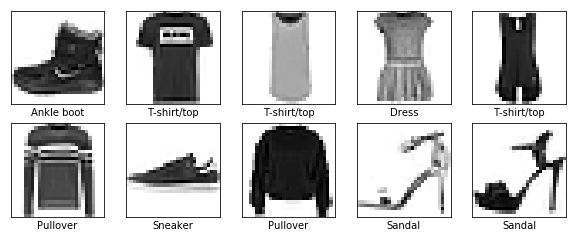

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[trainY[i]])
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

W0926 18:10:33.412209 140230431303552 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0926 18:10:33.417742 140230431303552 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0926 18:10:33.431562 140230431303552 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

W0926 18:10:33.487282 140230431303552 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0926 18:10:33.506139 140230431303552 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



### Execute the model using model.fit()

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5)

W0926 18:10:33.588574 140230431303552 deprecation.py:323] From /usr/local/lib/python2.7/dist-packages/tensorflow/python/ops/math_grad.py:1250: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0926 18:10:33.611161 140230431303552 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 77us/step - loss: 14.5044 - acc: 0.1001 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 4s 73us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 4s 75us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 4s 72us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

Batch normalization is not taught by teacher so far.Will be covered in next residency.

### Execute the model

In [15]:
test_loss, test_acc = model.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/step
('Test accuracy:', 0.1)


In [0]:
predictions = model.predict(testX)

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd = keras.optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=5)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/5
60000/60000 [==============================] - 5s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/5
60000/60000 [==============================] - 5s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/5
60000/60000 [==============================] - 5s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/5
60000/60000 [==============================] - 5s 76us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000


In [20]:
test_loss, test_acc = model.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 23us/step
('Test accuracy:', 0.1)


In [0]:
predictions = model.predict(testX)

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [0]:
hsgd = keras.optimizers.SGD(lr=0.03, decay=1e-6, momentum=0.9, nesterov=True)

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(100, activation=tf.nn.sigmoid),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(trainX, trainY, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 4s 62us/step - loss: 1.4570 - acc: 0.6447
Epoch 2/5
60000/60000 [==============================] - 4s 59us/step - loss: 0.8112 - acc: 0.7515
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.6858 - acc: 0.7692
Epoch 4/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.6509 - acc: 0.7802
Epoch 5/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.6462 - acc: 0.7854


## Review model

In [26]:
test_loss, test_acc = model.evaluate(testX, testY)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 27us/step
('Test accuracy:', 0.7686)


### Run the model

In [0]:
predictions = model.predict(testX)

In [28]:
predictions[0]

array([0.00334228, 0.00112812, 0.00343984, 0.00228632, 0.00146036,
       0.15153444, 0.00298882, 0.35918862, 0.01754181, 0.45708945],
      dtype=float32)

In [29]:
import numpy as np
np.argmax(predictions[0])

9

In [30]:
testY[0]

9